In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [40]:
from keras.datasets import boston_housing

In [41]:
raw_boston = load_boston()

C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        targ

In [42]:
print(raw_boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [43]:
df = pd.read_csv('C:/Users/bhatt/Downloads/housing.csv', header = None)
df = df.values
data = df[:, :-1]
target = df[:, -1]

In [44]:
data.shape, target.shape

((506, 13), (506,))

In [45]:
u = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
data = (data - u)/std

In [46]:
ones = np.ones((data.shape[0], 1))
data = np.hstack((ones, data))

In [47]:
split = 0.8

train_X = data[:int(split * data.shape[0]), :]
test_X = data[int(split * data.shape[0]):, :]
train_Y = target[:int(split * target.shape[0])]
test_Y = target[int(split * target.shape[0]):]

In [48]:
print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)

(404, 14) (102, 14) (404,) (102,)


In [49]:
train_X

array([[ 1.        , -0.41978194,  0.28482986, ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [ 1.        , -0.41733926, -0.48772236, ..., -0.30309415,
         0.44105193, -0.49243937],
       [ 1.        , -0.41734159, -0.48772236, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [ 1.        ,  1.2361952 , -0.48772236, ...,  0.80657583,
         0.44105193,  1.07470353],
       [ 1.        ,  0.69616637, -0.48772236, ...,  0.80657583,
         0.21310292,  1.07330179],
       [ 1.        ,  2.46573659, -0.48772236, ...,  0.80657583,
         0.44105193,  0.99760795]])

In [50]:
def hypothesis(X, weight):
    y_pred = 0
    for i in range(X.shape[0]):
        y_pred += weight[i] * X[i]
    return y_pred

In [51]:
def loss_func(X, weights, Y):
    loss = 0
    
    for i in range(X.shape[0]):
        Y_pred = hypothesis(X[i], weights)
        loss += (Y_pred - Y[i])**2

    return loss/X.shape[0]

In [52]:
def gradient(X, Y, weight):
    grad = np.zeros((X.shape[1], ))

    for j in range(X.shape[1]):
        for i in range(X.shape[0]):
            y_pred = hypothesis(X[i], weight)
            grad[j] += (y_pred - Y[i]) * X[i][j]
        
    return grad/X.shape[0]

In [53]:
def gradient_descent(X, Y):
    weights = np.zeros((X.shape[1], ))
    lr_rate = 0.03
    loss_epoch = []
    
    epochs = 1000
    
    for i in range(epochs):
        
        grad = gradient(X, Y, weights)
        
        loss_epoch.append(loss_func(X, weights, Y))
        
        for j in range(X.shape[1]):
            weights[j] = weights[j] - lr_rate * grad[j]
        
    return weights, loss_epoch

In [54]:
import time
start = time.time()
weights, loss_epoch = gradient_descent(train_X, train_Y)
print(time.time() - start)

28.5633864402771


In [55]:
weights

array([23.03829851, -1.62971667,  0.98212177,  0.19169693,  0.51555901,
       -1.6165734 ,  3.34953527,  0.05169315, -2.74332546,  3.26287864,
       -1.94644908, -1.71584799,  0.03474858, -3.81536968])

In [56]:
loss_epoch

[670.0209405940592,
 590.581587772515,
 527.8757701775032,
 477.36893650338806,
 435.85493377004696,
 401.05839892240766,
 371.35687139894435,
 345.58651710186444,
 322.9062507681232,
 302.7026516308741,
 284.5233790698483,
 268.0305036799736,
 252.9677586778422,
 239.13752461878443,
 226.3846228595929,
 214.58487473594312,
 203.63699899316703,
 193.45684987990776,
 183.97329852642105,
 175.1252699094152,
 166.85959417107432,
 159.12943338450887,
 151.89311635828415,
 145.1132640470167,
 138.75612307545745,
 132.79104932315448,
 127.19010062098795,
 121.927709589932,
 116.98041604983247,
 112.32664431974878,
 107.94651487438483,
 103.8216827392,
 99.93519706737844,
 96.27137780162344,
 92.81570636219239,
 89.5547280451149,
 86.47596434890062,
 83.56783383562599,
 80.81958041610538,
 78.2212081590314,
 75.76342188165764,
 73.43757289967027,
 71.23560940680571,
 69.15003102791283,
 67.17384714776622,
 65.30053866571596,
 63.52402286588397,
 61.83862112597924,
 60.23902921630313,
 58.7202

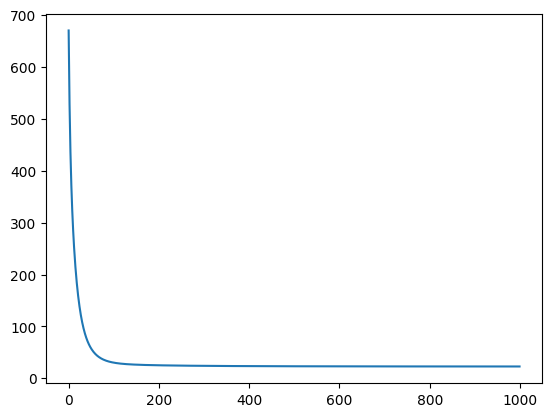

In [57]:
plt.plot(loss_epoch)

In [58]:
########################## OPTIMISATION ###########################################

In [59]:
def hypothesis(X, weight):
    return np.dot(X, weight)

In [60]:
def loss_func(X, weights, Y):
    loss = 0
    Y_pred = hypothesis(X, weights)
    loss = np.sum((Y_pred - Y)**2)
    return loss/X.shape[0]

In [61]:
def gradient(X, Y, weight):
    y_pred = hypothesis(X, weight)
    grad = np.dot(X.T, (y_pred - Y))
        
    return grad/X.shape[0]

In [62]:
def gradient_descent(X, Y):
    weights = np.zeros((X.shape[1], ))
    lr_rate = 0.03
    loss_epoch = []
    
    epochs = 1000
    
    for i in range(epochs):
        
        grad = gradient(X, Y, weights)
        
        loss_epoch.append(loss_func(X, weights, Y))
        
        weights = weights - lr_rate * grad
        
    return weights, loss_epoch

In [63]:
import time
start = time.time()
weights, loss_epoch = gradient_descent(train_X, train_Y)
print(time.time() - start)

0.041857004165649414


In [64]:
loss_epoch

[670.0209405940593,
 590.5815877725151,
 527.8757701775035,
 477.36893650338845,
 435.8549337700473,
 401.05839892240795,
 371.3568713989443,
 345.5865171018644,
 322.9062507681231,
 302.7026516308741,
 284.5233790698484,
 268.03050367997366,
 252.96775867784228,
 239.13752461878443,
 226.3846228595929,
 214.58487473594303,
 203.63699899316717,
 193.45684987990782,
 183.97329852642116,
 175.1252699094153,
 166.8595941710745,
 159.12943338450887,
 151.89311635828417,
 145.11326404701668,
 138.7561230754575,
 132.79104932315454,
 127.19010062098802,
 121.92770958993209,
 116.98041604983248,
 112.32664431974891,
 107.94651487438487,
 103.82168273920007,
 99.93519706737847,
 96.27137780162349,
 92.81570636219239,
 89.55472804511494,
 86.4759643489007,
 83.56783383562602,
 80.81958041610541,
 78.22120815903143,
 75.76342188165766,
 73.43757289967034,
 71.23560940680574,
 69.15003102791287,
 67.17384714776622,
 65.30053866571602,
 63.52402286588398,
 61.83862112597923,
 60.2390292163032,
 58

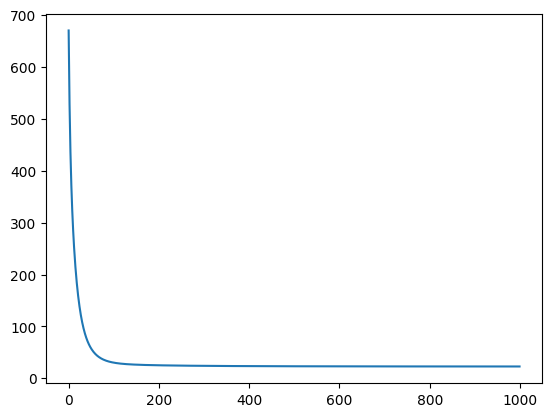

In [65]:
plt.plot(loss_epoch)

In [67]:
from sklearn import metrics

In [68]:
y_pred = hypothesis(test_X, weights)
print(y_pred.shape)

(102,)


In [69]:
print('MSE:', metrics.mean_squared_error(y_pred, test_Y))
print('RMSE:', metrics.mean_squared_error(y_pred, test_Y)**0.5)
print('MAE:', metrics.mean_absolute_error(y_pred, test_Y))

MSE: 28.587446223325887
RMSE: 5.346722942450439
MAE: 4.391302584186222


In [70]:
from sklearn.linear_model import LinearRegression

In [73]:
lr = LinearRegression()
lr.fit(train_X, train_Y)

LinearRegression()

In [74]:
y_pred = lr.predict(test_X)

In [75]:
print('MSE:', metrics.mean_squared_error(y_pred, test_Y))
print('RMSE:', metrics.mean_squared_error(y_pred, test_Y)**0.5)
print('MAE:', metrics.mean_absolute_error(y_pred, test_Y))

MSE: 32.79986268020692
RMSE: 5.727116436760031
MAE: 4.730017250961025
